## PYT Assignment - Propensity Model

#### Step 1: Problem Definition & Proposed Solution
  - Objective here is to build a propensity model to predict if a particular lead will convert or not (booked a trip with PYT)
  - First we can do a level of customer segmentation based on existing features in deciles

----------

#### Step 2: Hypothesis generation
What are the factors that may affect conversion?
  - Lead Turn around time (TAT)
  - When was the lead generated?
  - What was the channel through which it was generated?
  - Personal characteristics (Age, Gender, City etc)
  - When was the lead last active?
-------        
#### Step 3: Understanding the dataset 
<b> 3.1 - Import necessary libs and read data </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
df = pd.read_csv('Modeling-Assignment Dataset.csv')
df.head()

,booked_y_n,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active
0,1,15634602,Hargrave,4,Networks,Female,42,Bangalore,None,1,1,1
1,0,15647311,Hill,4,Organic,Female,41,Hyderabad,None,1,1,0
2,1,15619304,Onio,3,Networks,Female,42,Mumbai,Platinum,3,0,1
3,0,15701354,Boni,4,Networks,Female,39,Hyderabad,None,2,0,0
4,0,15737888,Mitchell,6,Organic,Female,43,Bangalore,Base,1,1,1


<b> 3.2 - Changing data type from int64 to object </b>

In [2]:
print(df.shape)
df.LeadId = df.LeadId.astype(str)
df.months_since_lead_gen = df.months_since_lead_gen.astype(str)
df.no_of_family_members = df.no_of_family_members.astype(str)
df.is_6M_enquiry = df.is_6M_enquiry.astype(str)
df.is_3M_active = df.is_3M_active.astype(str)
#df.booked_y_n = df.booked_y_n.astype(str)
print(df.dtypes)

(10000, 12)
booked_y_n                int64
LeadId                   object
Surname                  object
months_since_lead_gen    object
lead_gen_channel         object
Gender                   object
Age                       int64
City                     object
airline_loyalty_tier     object
no_of_family_members     object
is_6M_enquiry            object
is_3M_active             object
dtype: object


<b> 3.2 - Understanding categorical vars </b>

In [3]:
cat_var = df.dtypes.loc[df.dtypes == 'object'].index
#print(cat_var)
df['airline_loyalty_tier'].value_counts()/df.shape[0]

None        0.5694
Base        0.1672
Silver      0.1465
Platinum    0.0598
Gold        0.0571
Name: airline_loyalty_tier, dtype: float64

In [4]:
df['lead_gen_channel'].value_counts()/df.shape[0]

Networks    0.5014
Direct      0.2509
Organic     0.2477
Name: lead_gen_channel, dtype: float64

-------
#### Step 4: Data Preparation
<b> 4.1 - Missing value treatment <b>

In [5]:
df.isnull().sum()

booked_y_n               0
LeadId                   0
Surname                  0
months_since_lead_gen    0
lead_gen_channel         0
Gender                   0
Age                      0
City                     0
airline_loyalty_tier     0
no_of_family_members     0
is_6M_enquiry            0
is_3M_active             0
dtype: int64

There's no missing values in this dataset.

<b> 4.2 - Outlier treatment </b> <br>

First let us detect outliers using Z-Score 

In [6]:
from scipy import stats
import numpy as np

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
con_train = df.select_dtypes(include=numerics)
z = np.abs(stats.zscore(con_train))
print(np.where(z > 3))

(array([  85,  158,  230,  252,  310,  371,  602,  766,  888, 1009, 1039,
       1055, 1205, 1342, 1410, 1614, 1790, 1933, 2002, 2012, 2108, 2159,
       2164, 2433, 2458, 2553, 2772, 2778, 2855, 2901, 2925, 3033, 3110,
       3142, 3311, 3317, 3366, 3378, 3382, 3387, 3396, 3499, 3531, 3602,
       3651, 3691, 3702, 3813, 3826, 3880, 3888, 3994, 4162, 4256, 4273,
       4318, 4366, 4378, 4501, 4590, 4644, 4801, 4815, 4832, 4931, 5068,
       5197, 5223, 5299, 5313, 5377, 5490, 5508, 5664, 5671, 5783, 5840,
       5957, 6116, 6167, 6173, 6230, 6278, 6366, 6443, 6530, 6581, 6721,
       6759, 7057, 7058, 7063, 7202, 7243, 7272, 7302, 7362, 7375, 7499,
       7523, 7526, 7552, 7692, 7719, 7788, 7898, 7956, 8019, 8156, 8217,
       8458, 8469, 8686, 8787, 8865, 8900, 9080, 9112, 9292, 9309, 9324,
       9333, 9425, 9472, 9490, 9555, 9587, 9589, 9646, 9671, 9736, 9894,
       9936], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 

* Removing Outliers if Z-Score > 3

In [7]:
print(con_train.shape)
con_train = con_train[(z < 3).all(axis=1)]
print(con_train.shape)

(10000, 2)
(9867, 2)


<b> 4.3 - Redundancy Check <b>

In [8]:
df.duplicated('LeadId').sum()

0

<b>4.4 - Imbalance Check </b>

In [9]:
df['booked_y_n'].value_counts()/df.shape[0]

0    0.7963
1    0.2037
Name: booked_y_n, dtype: float64

The dataset is highly imbalanced. We can use sampling methods to address the same.

----

#### 5. Exploratory Data Analysis
<b>5.1 Univariate Analysis </b>

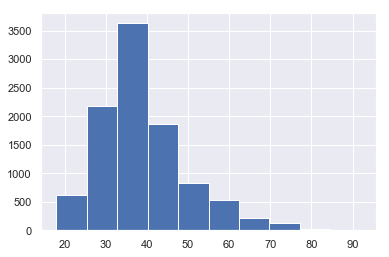

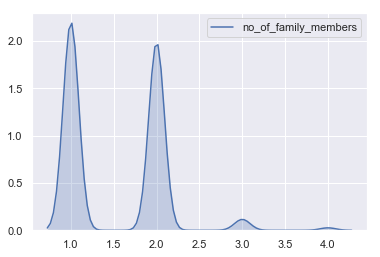

In [10]:
import matplotlib.pyplot as plt

#Histogram
plt.hist(df.Age, bins=10)
plt.show()

#Density Plot
sns.kdeplot(df['no_of_family_members'], shade=True)
plt.show()

<b> 5.2 Bivariate Analysis </b>
  - Correlation (Con & Con)

In [11]:
df.corr()

,booked_y_n,Age
booked_y_n,1.000000,0.285323
Age,0.285323,1.000000


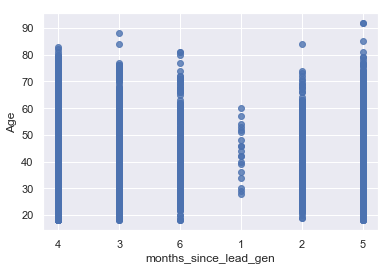

In [12]:
#Scatter Plot
sns.regplot(y=df["Age"], x=df["months_since_lead_gen"], fit_reg=False)
plt.show()

* Cross Tab (Cat & Con)

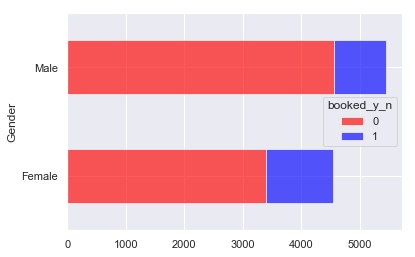

In [13]:
crosstab = pd.crosstab(df.Gender, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

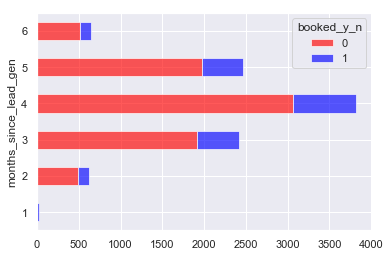

In [14]:
crosstab = pd.crosstab(df.months_since_lead_gen, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

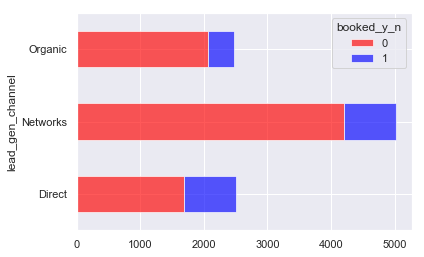

In [15]:
crosstab = pd.crosstab(df.lead_gen_channel, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

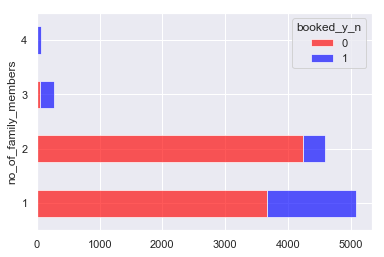

In [16]:
crosstab = pd.crosstab(df.no_of_family_members, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

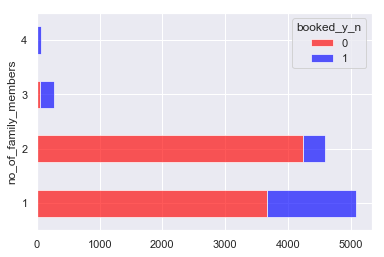

In [17]:
crosstab = pd.crosstab(df.no_of_family_members, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

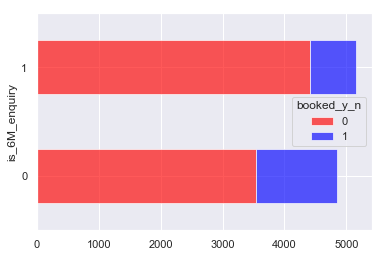

In [18]:
crosstab = pd.crosstab(df.is_6M_enquiry, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

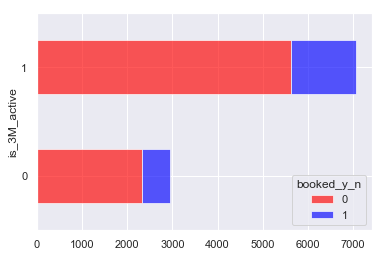

In [19]:
crosstab = pd.crosstab(df.is_3M_active, df['booked_y_n'], margins = True)
crosstab.iloc[:-1,:-1]
crosstab.iloc[:-1,:-1].plot(kind = 'barh', stacked = True, color = ['red','blue'], alpha = 0.65)
plt.show()

----
#### 6. Feature Engineering:
<b> 6.1 Feature Creation </b>

![alt text](1.png)

Totally 2,037 leads were converted. Breakdown is as follows -
* 00 - Not active & No enquiry
* 01 - Not active but did enquiry
* 10 - Active but no enquiry
* 11 - Active and did enquiry

In [20]:
def flag_df(df):
    if (df['is_3M_active'] == '1' and df['is_6M_enquiry'] == '0'):
        return 'First'
    elif (df['is_3M_active'] == '1' and df['is_6M_enquiry'] == '1'):
        return 'Second'
    elif (df['is_3M_active'] == '0' and df['is_6M_enquiry'] == '0'):
        return 'Third'
    elif (df['is_3M_active'] == '0' and df['is_6M_enquiry'] == '1'):
        return 'Fourth'

df['Flag'] = df.apply(flag_df, axis = 1)

In [21]:
df.tail()

,booked_y_n,LeadId,Surname,months_since_lead_gen,lead_gen_channel,Gender,Age,City,airline_loyalty_tier,no_of_family_members,is_6M_enquiry,is_3M_active,Flag
9995,0,15606229,Obijiaku,5,Networks,Male,39,Chennai,None,2,0,1,First
9996,0,15569892,Johnstone,3,Networks,Male,35,Cochin,None,1,1,1,Second
9997,1,15584532,Liu,5,Networks,Female,36,Surat,None,1,1,0,Fourth
9998,1,15682355,Sabbatini,5,Direct,Male,42,Chandigarh,None,2,0,1,First
9999,0,15628319,Walker,5,Networks,Female,28,Delhi,Silver,1,0,1,First


--------

#### 7. Predictive Modeling:

<b> 7.1 Encoding categorical variables </b>

In [22]:
#Step 1 - Data Preprocessing. Conv text to numbers. 
#Label encoder is used to conv categories to num

from sklearn.preprocessing import LabelEncoder
categorical_variables = df.dtypes[df.dtypes == 'object'].index
categorical_variables

#Conv them using Label Encoder
le = LabelEncoder()
for var in categorical_variables:
    df[var] = le.fit_transform(df[var])

<b> 7.2 Comparing ML algos </b>

In [23]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [24]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#Step 1: Convert Dataframe into matrix
dataArray = df.values

#Step 2: Splitting Input features & Output Variables
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

#Step 3: Splitting training & testing
validation_size = 0.10
seed = 9
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=validation_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(9000, 12)
(1000, 12)
(9000,)
(1000,)


In [25]:
num_trees = 200
max_features = 3
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Fit Models and Evaulate

results = []
names = []
scoring = 'accuracy'

#Cross Validation
for name, model in models:
 kfold = KFold(n_splits = 10, random_state=7)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.809556 (0.012835)
LDA: 0.808222 (0.010198)
KNN: 0.763111 (0.016628)
CART: 0.781889 (0.011429)
RF: 0.859333 (0.010113)
NB: 0.832778 (0.006111)
SVM: 0.796444 (0.014839)


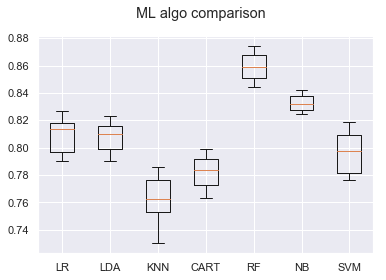

In [26]:
#lets box plot model scores

fig = pyplot.figure()
fig.suptitle('ML algo comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

RF gave the best accuracy since Tree based models are better equipped to handle imbalanced datasets <br>
However, for our use case, accuracy is not the best metric to track. <br>
Here the cost of False negative is higher then the cost of False positive.

-----
<b> 7.3 Validation - Accuracy and Recall </b>

In [27]:
#create prediction model
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

#fit model
model.fit(X_train, Y_train)

#predict!
predictions = model.predict(X_test)

#check accuracy
print("Model --- RF")
print("Accuracy: {} ".format(accuracy_score(Y_test,predictions) * 100))
print(classification_report(Y_test, predictions))

Model --- RF
Accuracy: 86.5 
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       795
           1       0.78      0.48      0.59       205

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.83      0.72      0.76      1000
weighted avg       0.86      0.86      0.85      1000



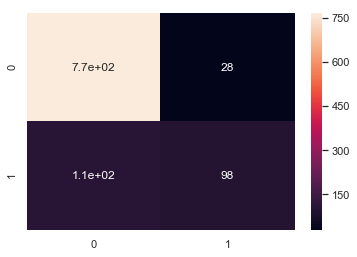

<Figure size 648x648 with 0 Axes>

In [28]:
#plotting confusion matrix on heatmap
cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, xticklabels=['0','1'], yticklabels=['0','1'])
plt.figure(figsize=(9,9))
plt.show()

Here we can see the biased nature of the dataset. This might become a huge problem when the model moves into production. <br>
We can curb this by using resampling techniques.

----
<b> 7.4 Resampling and Remodeling <b>

In [29]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [30]:
df.booked_y_n.value_counts()

0    7963
1    2037
Name: booked_y_n, dtype: int64

In [31]:
df_encoded = pd.get_dummies(df)

In [32]:
training_features, test_features, \
training_target, test_target, = train_test_split(df_encoded.drop(['booked_y_n'], axis=1),
                                               df_encoded['booked_y_n'],
                                               test_size = .1,
                                               random_state=12)


In [33]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [34]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)


In [35]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [36]:
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))
print('\nTest Results')
print(clf_rf.score(test_features, test_target))
print(recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
0.8222222222222222
0.5659340659340659

Test Results
0.823
0.596244131455399


Here we can see the results between validation set and test set and pretty close and hence we can say we a certain level of confidence that the model will generalize well

----------
<b> 7.5 Saving the model <b>

In [39]:
import pickle
pickle.dump(model, open("C:/Users/HEWLETT PACKARD\Desktop\PYT\gofornaman.github.io/pyt/deployed/Prediction/NNmodel/model.pkl","wb"))

----
<b> 7.6 Deployment Screenshots <b>

<img src="1.png">
<img src="2.png">
    
------------

#### 8. External Links:

* Deployment Link -
* Dashboard Link - 
* Colab Link -
* Github Link - 

-----------